In [2]:
import pandas as pd
import pyreadstat as ps
from functools import reduce
from sklearn.decomposition import PCA


In [3]:
og_aut, aut_meta = ps.read_sav('MPNWAVE8_AUTOdata.sav')
og_dab, dab_meta = ps.read_sav('MPNWAVE8_DAGBOEKdata.sav')
og_dag, dag_meta = ps.read_sav('MPNWAVE8_DAGdata.sav')
og_hhd, hhd_meta = ps.read_sav('MPNWAVE8_HHdata.sav')
og_pda, pda_meta = ps.read_sav('MPNWAVE8_Pdata.sav')
og_pbz, pbz_meta = ps.read_sav('MPNWAVE8_Pdata_bijzonder.sav')
og_wee, wee_meta = ps.read_sav('MPNWAVE8_weegfactoren.sav')

In [4]:
# aut cleaned
aut_dropcols = ['AUTO1_HFDGBR', 'KENTEKENS_INGEVULD', 'AUTO1_BRANDSTOF_A_w6', 'AUTO1_BRANDSTOF_B_w6', 'AUTO1_BIJTELLING_w5', 'AUTO1_GEWMAX', 'AUTO1_GEWLEEG',  'AUTO1_HLID5', 'AUTO1_HLID6', 'AUTO1_HLID7', 'AUTO1_HLID8', 'AUTO1_HLID9', 'AUTO1_HLID10', 'AUTO1_HLID11', 'AUTO1_HLID12', 'AUTO1_HLID13', 'AUTO2_BRANDSTOF_A_w6', 'AUTO2_BRANDSTOF_B_w6', 'AUTO2_BIJTELLING_w5','AUTO2_GEWMAX', 'AUTO2_GEWLEEG', 'AUTO2_HLID5', 'AUTO2_HLID6', 'AUTO2_HLID7', 'AUTO2_HLID8', 'AUTO2_HLID9', 'AUTO2_HLID10', 'AUTO2_HLID11', 'AUTO2_HLID12', 'AUTO2_HLID13', 'AUTO3_BRANDSTOF_A_w6', 'AUTO3_BRANDSTOF_B_w6', 'AUTO3_BIJTELLING_w5', 'AUTO3_GEWMAX', 'AUTO3_GEWLEEG', 'AUTO3_HLID5', 'AUTO3_HLID6', 'AUTO3_HLID7', 'AUTO3_HLID8', 'AUTO3_HLID9', 'AUTO3_HLID10', 'AUTO3_HLID11', 'AUTO3_HLID12','AUTO3_HLID13','AUTO4_GEWLEEG', 'AUTO4_BRANDSTOF_A_w6', 'AUTO4_BRANDSTOF_B_w6', 'AUTO4_BIJTELLING_w5','AUTO4_HLID5', 'AUTO4_HLID6', 'AUTO4_HLID7', 'AUTO4_HLID8', 'AUTO4_HLID9', 'AUTO4_HLID10', 'AUTO4_HLID11', 'AUTO4_HLID12', 'AUTO4_HLID13', 'AUTO5_BRANDSTOF_A_w6', 'AUTO5_BRANDSTOF_B_w6', 'AUTO5_BIJTELLING_w5', 'AUTO5_GEWMAX', 'AUTO5_GEWLEEG', 'AUTO5_HLID5', 'AUTO5_HLID6', 'AUTO5_HLID7', 'AUTO5_HLID8', 'AUTO5_HLID9', 'AUTO5_HLID10', 'AUTO5_HLID11', 'AUTO5_HLID12', 'AUTO5_HLID13',]
aut_80nan = og_aut.columns[og_aut.isna().mean() > 0.8].tolist()
aut_drop = aut_dropcols + aut_80nan
aut = og_aut.drop(columns=aut_drop, axis=1)

In [5]:
# dab cleaning
dab_dropcols = []
dab_80nan = og_dab.columns[og_dab.isna().mean() > 0.8].tolist()
dab_drop = dab_dropcols + dab_80nan
dab = og_dab.drop(columns=dab_drop, axis=1)

In [6]:
# dag cleaning
dag_dropcols = []
dag_80nan = og_dag.columns[og_dag.isna().mean() > 0.8].tolist()
dag_drop = dag_dropcols + dag_80nan
dag = og_dag.drop(columns=dag_drop, axis=1)


In [7]:
# hhd cleaned

hhd_dropcols = ['JAAR', 'PROV', 'HHMOTOR', 'HHBROM', 'HHSNOR', 'HHFIETS', 'HHVOUWFIETS', 'HHEBIKE', 'HHPEDEL', 'HHSCOOT', 'HHOVG', 'HHGEEN', 'KENTEKENINFO', 'woonpc2']
hhd_80nan = og_hhd.columns[og_hhd.isna().mean() > 0.8].tolist()
hhd_drop = hhd_dropcols + hhd_80nan
hhd = og_hhd.drop(columns=hhd_drop, axis=1)

# hhd = hhd.drop(hhd[hhd['COROP'] != 23].index) # Greater-Amsterdam
# hhd = hhd.drop(hhd[hhd['STED_GM'] != 1].index) # high urbanization

In [8]:
#pda cleaning

pda_dropcols = ['HH_VALID']
pda_80nan = og_pda.columns[og_pda.isna().mean() > 0.8].tolist()
pda_drop = pda_dropcols + pda_80nan
pda = og_pda.drop(columns=pda_drop, axis=1)

In [9]:
#pbz cleaned
pbz_dropcols = ['OORDEEL_TREIN', 'OORDEEL_BTM', 'OORDEEL_FIETS', 'OORDEEL_BROMMER', 'OORDEEL_LOPEN', 'OORDEEL_VLIEGTUIG', 'GEBRUIK_TREIN_STELLING1', 'GEBRUIK_TREIN_STELLING2', 'GEBRUIK_TREIN_STELLING3', 'GEBRUIK_TREIN_STELLING4', 'GEBRUIK_TREIN_STELLING5', 'GEBRUIK_TREIN_STELLING6', 'GEBRUIK_TREIN_STELLING7', 'GEBRUIK_BTM_STELLING1', 'GEBRUIK_BTM_STELLING2', 'GEBRUIK_BTM_STELLING3', 'GEBRUIK_BTM_STELLING4', 'GEBRUIK_BTM_STELLING5', 'GEBRUIK_BTM_STELLING6', 'GEBRUIK_BTM_STELLING7', 'GEBRUIK_FIETS_STELLING1', 'GEBRUIK_FIETS_STELLING2', 'GEBRUIK_FIETS_STELLING3', 'GEBRUIK_FIETS_STELLING4', 'GEBRUIK_FIETS_STELLING5', 'GEBRUIK_FIETS_STELLING6', 'GEBRUIK_FIETS_STELLING7', 'GEBRUIK_LOPEN_STELLING1', 'GEBRUIK_LOPEN_STELLING2', 'GEBRUIK_LOPEN_STELLING3', 'GEBRUIK_LOPEN_STELLING4', 'GEBRUIK_LOPEN_STELLING5', 'GEBRUIK_LOPEN_STELLING6', 'GEBRUIK_LOPEN_STELLING7', 'VVM_TOEKOMST_ANDERS_TREIN', 'VVM_TOEKOMST_ANDERS_BTM', 'VVM_TOEKOMST_ANDERS_FIETS', 'VVM_TOEKOMST_ANDERS_BROM', 'VVM_TOEKOMST_ANDERS_LOPEN', 'VVM_TOEKOMST_ANDERS_VLIEGTUIG', 'COR_OV_VOORHEEN_TREIN', 'COR_OV_VOORHEEN_BTM', 'COR_BTM_SUBST_1', 'COR_BTM_SUBST_2', 'COR_BTM_SUBST_5', 'COR_TREIN_SUBST_1', 'COR_TREIN_SUBST_2', 'COR_TREIN_SUBST_4', 'COR_OV_SUBST_FIETS_ERV_S1', 'COR_OV_SUBST_FIETS_ERV_S2', 'COR_OV_SUBST_FIETS_ERV_S3', 'COR_OV_SUBST_BROM_ERV_S1', 'COR_OV_SUBST_BROM_ERV_S2', 'COR_OV_SUBST_BROM_ERV_S3', 'COR_OV_SUBST_LOOP_ERV_S1', 'COR_OV_SUBST_LOOP_ERV_S2', 'COR_OV_SUBST_LOOP_ERV_S3']
pbz_80nan = og_pbz.columns[og_pbz.isna().mean() > 0.8].tolist()
pbz_drop = pbz_dropcols + pbz_80nan
pbz = og_pbz.drop(columns=pbz_drop, axis=1)

In [10]:
all = [aut, dab, hhd]
movement = [dag, pda, pbz]

In [11]:
for i, df in enumerate(all):
    if not isinstance(df, (pd.DataFrame, pd.Series)):
        print(f"Element {i} is of type {type(df)}, not a Pandas DataFrame or Series.")

In [12]:
merged = pd.concat(all, join='inner', axis=1).fillna(0)
merged = merged.loc[:, ~merged.columns.duplicated()] # drop duplicates
display(merged)

,HHID,HH_VALID,IMPHHDATA,DEELNAMEHH,JAAR,HHAUTO_N,AUTO1,AUTO1_KM,AUTO1_AANSCHAF,AUTO1_INRICHT,...,wlokatie_centrumsgw,wlokatie_opafrit,wlokatie_icknooppunt,wlokatie_station,wlokatie_metrosneltramhalte,wlokatie_tramhalte,wlokatie_bushalte4xpu,wlokatie_bushalte2xpu,wlokatie_bushalte1xpu,wlokatie_bushaltekl1xpu
0,30000715.0,1.0,2.0,2017.0,2019.0,1.0,1.0,2.0,1.0,5.0,...,25613.0,7107.0,26497.0,8895.0,80653.0,99866.0,359.0,359.0,359.0,359.0
1,30001201.0,2.0,2.0,2017.0,2019.0,2.0,1.0,4.0,1.0,8.0,...,7681.0,2302.0,7957.0,2802.0,8009.0,33504.0,290.0,290.0,290.0,290.0
2,30001210.0,2.0,2.0,2013.0,2019.0,1.0,1.0,1.0,1.0,5.0,...,2364.0,2320.0,3133.0,119.0,57999.0,75895.0,233.0,233.0,233.0,233.0
3,30001492.0,2.0,2.0,2017.0,2019.0,1.0,1.0,2.0,1.0,8.0,...,13603.0,2189.0,9380.0,3342.0,32993.0,29914.0,2322.0,580.0,580.0,580.0
4,30001531.0,2.0,2.0,2017.0,2019.0,1.0,1.0,1.0,1.0,8.0,...,10657.0,2722.0,4004.0,3118.0,118460.0,123262.0,1316.0,322.0,322.0,322.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,80000211.0,0.0,2.0,2020.0,2019.0,0.0,0.0,0.0,0.0,0.0,...,17558.0,1257.0,5778.0,446.0,11809.0,9805.0,296.0,296.0,296.0,296.0
3496,80000212.0,0.0,2.0,2020.0,2019.0,1.0,1.0,6.0,1.0,0.0,...,9604.0,1696.0,9815.0,1909.0,9160.0,36623.0,918.0,232.0,232.0,232.0
3497,80000213.0,0.0,2.0,2020.0,2019.0,1.0,1.0,2.0,1.0,5.0,...,24285.0,1799.0,23971.0,903.0,94536.0,94070.0,931.0,652.0,652.0,652.0
3498,80000214.0,0.0,2.0,2020.0,2019.0,2.0,1.0,4.0,1.0,5.0,...,47644.0,15496.0,34484.0,15606.0,32779.0,42046.0,2650.0,1953.0,1953.0,215.0


In [13]:
# Correlation matrix
column_headers = merged.columns
for columns in column_headers:
    print(columns)

HHID
HH_VALID
IMPHHDATA
DEELNAMEHH
JAAR
HHAUTO_N
AUTO1
AUTO1_KM
AUTO1_AANSCHAF
AUTO1_INRICHT
AUTO1_PRIVE
AUTO1_HLID1
AUTO1_HLID2
AUTO1_HLID3
AUTO2
AUTO2_KM
AUTO2_AANSCHAF
AUTO2_HFDGBR
AUTO2_PRIVE
AUTO2_HLID1
AUTO3
AUTO4
AUTO5
KAUTO1_BOUWJAAR
KAUTO2_BOUWJAAR
PERSOON
PERSID
P_VALID
VPLID
WEGGEWEEST
VERTREKP
AANTVPL
VPLDAGNR
VERPL
VERPLNR
TOER
TOER_TYPE
AANTRIT
DOEL
MOTIEF
KMOTIEF
VERTPROV
AANKPROV
AFSTV
AFSTV_ORG
G_AFSTAND
KAFSTV
HVM
KHVM
KVERTTIJD
REISDUUR
KREISDUUR
REISDUUR_ORG
G_REISDUUR
ROLAUTO
PARKEERKOSTEN
VERTRAGING
AutoSoort
RitID
RIT
RITNR
RVM
KRVM
Bestuurder
SAMENREIZEN
CORRECTIE_VVM
MARKERING_VVM
CORRECTIE_AFSTAND
CORRECTIE_REISTIJD
MARKERING_REISTIJD1
MARKERING_REISTIJD2
MARKERING_AFSTAND
MARKERING_OVERIG
vlokatie_centrumsgw
vlokatie_opafrit
vlokatie_icknooppunt
vlokatie_station
vlokatie_metrosneltramhalte
vlokatie_tramhalte
vlokatie_bushalte4xpu
vlokatie_bushalte2xpu
vlokatie_bushalte1xpu
vlokatie_bushaltekl1xpu
alokatie_centrumsgw
alokatie_opafrit
alokatie_icknooppunt
aloka

In [14]:
move = dag.merge(pda, on = 'PERSID', how='inner').fillna(0)
move = move.loc[:, ~move.columns.duplicated()] # drop duplicates
display(move)

,PERSOON,HHID_x,HH_VALID,IMPHHDATA_x,P_VALID_x,PERSID,JAAR_x,VPLDAGNR,WEGGEWEEST,REISGEDRAG,...,INVLOED5_EVENT_WONING13,INVLOED6_EVENT_WONING13,INVLOED7_EVENT_WONING13,INVLOED8_EVENT_WONING13,INVLOED9_EVENT_WONING13,INVLOED10_EVENT_w5_WONING13,INVLOED11_EVENT_WONING13,INVLOED12_EVENT_WONING13,INVLOED_EVENT_WONING13,KLEEFT2
0,1.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0
1,0.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0
2,0.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,3.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0
3,1.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0
4,0.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,2.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15961,0.0,80000215.0,2.0,2.0,3.0,8.000022e+09,2020.0,2.0,0.0,99.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
15962,0.0,80000215.0,2.0,2.0,3.0,8.000022e+09,2020.0,3.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
15963,1.0,80000215.0,2.0,2.0,3.0,8.000022e+09,2020.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
15964,0.0,80000215.0,2.0,2.0,3.0,8.000022e+09,2020.0,2.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0


In [15]:
# display(move['HHID_x'].value_counts())
# display(move['PERSID'].value_counts())
# display(move)


move.sort_values(by='HHID_x', inplace=True)

# Create a dictionary to store DataFrames split by 'HHID_x'
split_dfs = {}
prev_HHID = None
start_idx = 0

for idx, row in move.iterrows():
    current_HHID = row['HHID_x']
    
    if current_HHID != prev_HHID and prev_HHID is not None:
        split_dfs[prev_HHID] = move.iloc[start_idx:idx]
        start_idx = idx
    
    prev_HHID = current_HHID

# Store the last group
split_dfs[prev_HHID] = move.iloc[start_idx:]

# Now split_dfs contains DataFrames for each unique 'HHID_x'
# for key, df in split_dfs.items():
    # print(f"DataFrame for HHID_x {key}:")
    # print(df)
    # print("\n") 

# Accessing a specific DataFrame from the dictionary
specific_HHID_df = split_dfs[30000715.0]

# Print the DataFrame or perform operations on it
display(specific_HHID_df)


,PERSOON,HHID_x,HH_VALID,IMPHHDATA_x,P_VALID_x,PERSID,JAAR_x,VPLDAGNR,WEGGEWEEST,REISGEDRAG,...,INVLOED5_EVENT_WONING13,INVLOED6_EVENT_WONING13,INVLOED7_EVENT_WONING13,INVLOED8_EVENT_WONING13,INVLOED9_EVENT_WONING13,INVLOED10_EVENT_w5_WONING13,INVLOED11_EVENT_WONING13,INVLOED12_EVENT_WONING13,INVLOED_EVENT_WONING13,KLEEFT2
0,1.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,1.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0
1,0.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0
2,0.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,3.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7.0
3,1.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0
4,0.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,2.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0
5,0.0,30000715.0,1.0,2.0,3.0,3.000072e+09,2020.0,3.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0


Algorithm found 4 clusters.
Points per cluster: Counter({0: 81, 1: 74, 2: 73, 3: 72})
True labels have 4 clusters.
Points per cluster for true labels: Counter({1: 75, 3: 75, 0: 75, 2: 75})
Silhouette Score: 0.5801493524075835



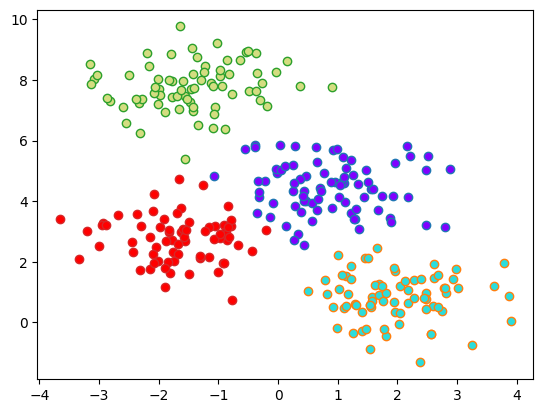

In [21]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

X = hhd
Y = X

# Function to plot true labels and cluster labels side by side
def plot_true_vs_clustered(X, true_labels, cluster_labels, cluster_centers=None):
    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Plot true labels
    axs[0].set_title('True Labels')
    unique_true_labels = set(true_labels)
    colors_true = plt.cm.rainbow(np.linspace(0, 1, len(unique_true_labels)))
    for k, col in zip(unique_true_labels, colors_true):
        class_member_mask = (true_labels == k)
        xy = X[class_member_mask]
        axs[0].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)

    # Plot clustered labels
    axs[1].set_title('Clustered Labels')
    unique_cluster_labels = set(cluster_labels)
    colors_cluster = plt.cm.rainbow(np.linspace(0, 1, len(unique_cluster_labels)))
    for k, col in zip(unique_cluster_labels, colors_cluster):
        class_member_mask = (cluster_labels == k)
        xy = X[class_member_mask]
        axs[1].plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
        if cluster_centers is not None and k != -1:
            center = cluster_centers[k]
            axs[1].plot(center[0], center[1], 'o', markerfacecolor=col, markeredgecolor='k', markeredgewidth=2, markersize=14)

    plt.show()

# Function to plot the first two columns
def plot_clustered(X, cluster_centers):
    X = np.asarray(X)
    nfeature = X.shape[-1]
    if nfeature > 2:
        X = X[:,:2]
    if nfeature < 2:
        print("Error")
    # Plot clustered labels
    unique_cluster_labels = set(cluster_labels)
    colors_cluster = plt.cm.rainbow(np.linspace(0, 1, len(unique_cluster_labels)))
    for k, col in zip(unique_cluster_labels, colors_cluster):
        class_member_mask = (cluster_labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col)
    plt.show()

# Generate synthetic data
X, true_labels = make_blobs(n_samples=300, centers=4, cluster_std=0.80, random_state=0)

# KMeans crucial parameters: n_clusters, init, n_init, max_iter, random_state
# This is the method
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
cluster_labels = kmeans.fit_predict(X)

### The algorithm end here, the following code calculates the number of each clusters and plots it
cluster_counts = Counter(cluster_labels)
print(f"Algorithm found {len(cluster_counts)} clusters.")
print("Points per cluster:", cluster_counts)
true_label_counts = Counter(true_labels)
print(f"True labels have {len(true_label_counts)} clusters.")
print("Points per cluster for true labels:", true_label_counts)

# Silhouette Score
print(f"Silhouette Score: {silhouette_score(X, cluster_labels)}\n")

# Plot true labels vs. clustering results
plot_clustered(X, cluster_labels)
#plot_true_vs_clustered(X, true_labels, cluster_labels)


In [22]:
correlation_matrix = Y.corr()

# Print or display the correlation matrix
print(correlation_matrix)

                                 HHID  HH_VALID  IMPHHDATA  DEELNAMEHH   
HHID                         1.000000 -0.133145  -0.109311    0.649006  \
HH_VALID                    -0.133145  1.000000   0.443932   -0.135960   
IMPHHDATA                   -0.109311  0.443932   1.000000   -0.117451   
DEELNAMEHH                   0.649006 -0.135960  -0.117451    1.000000   
PERSID_GK                    1.000000 -0.132613  -0.104941    0.648113   
STED_GM                      0.004584 -0.055114  -0.035112    0.015491   
COROP                       -0.033422  0.014409   0.026120   -0.024775   
HHPERS                       0.020047 -0.273976  -0.061623    0.002786   
HHSAM                        0.257555 -0.167729  -0.508723    0.173216   
GEZINSCYCLUS                -0.017191 -0.190027  -0.032484    0.019582   
N_KIND                      -0.092378 -0.055362  -0.042640   -0.042504   
HHBRUTOINK2_w5              -0.042332 -0.068367   0.006400   -0.036930   
HHAUTO_N                     0.246309 

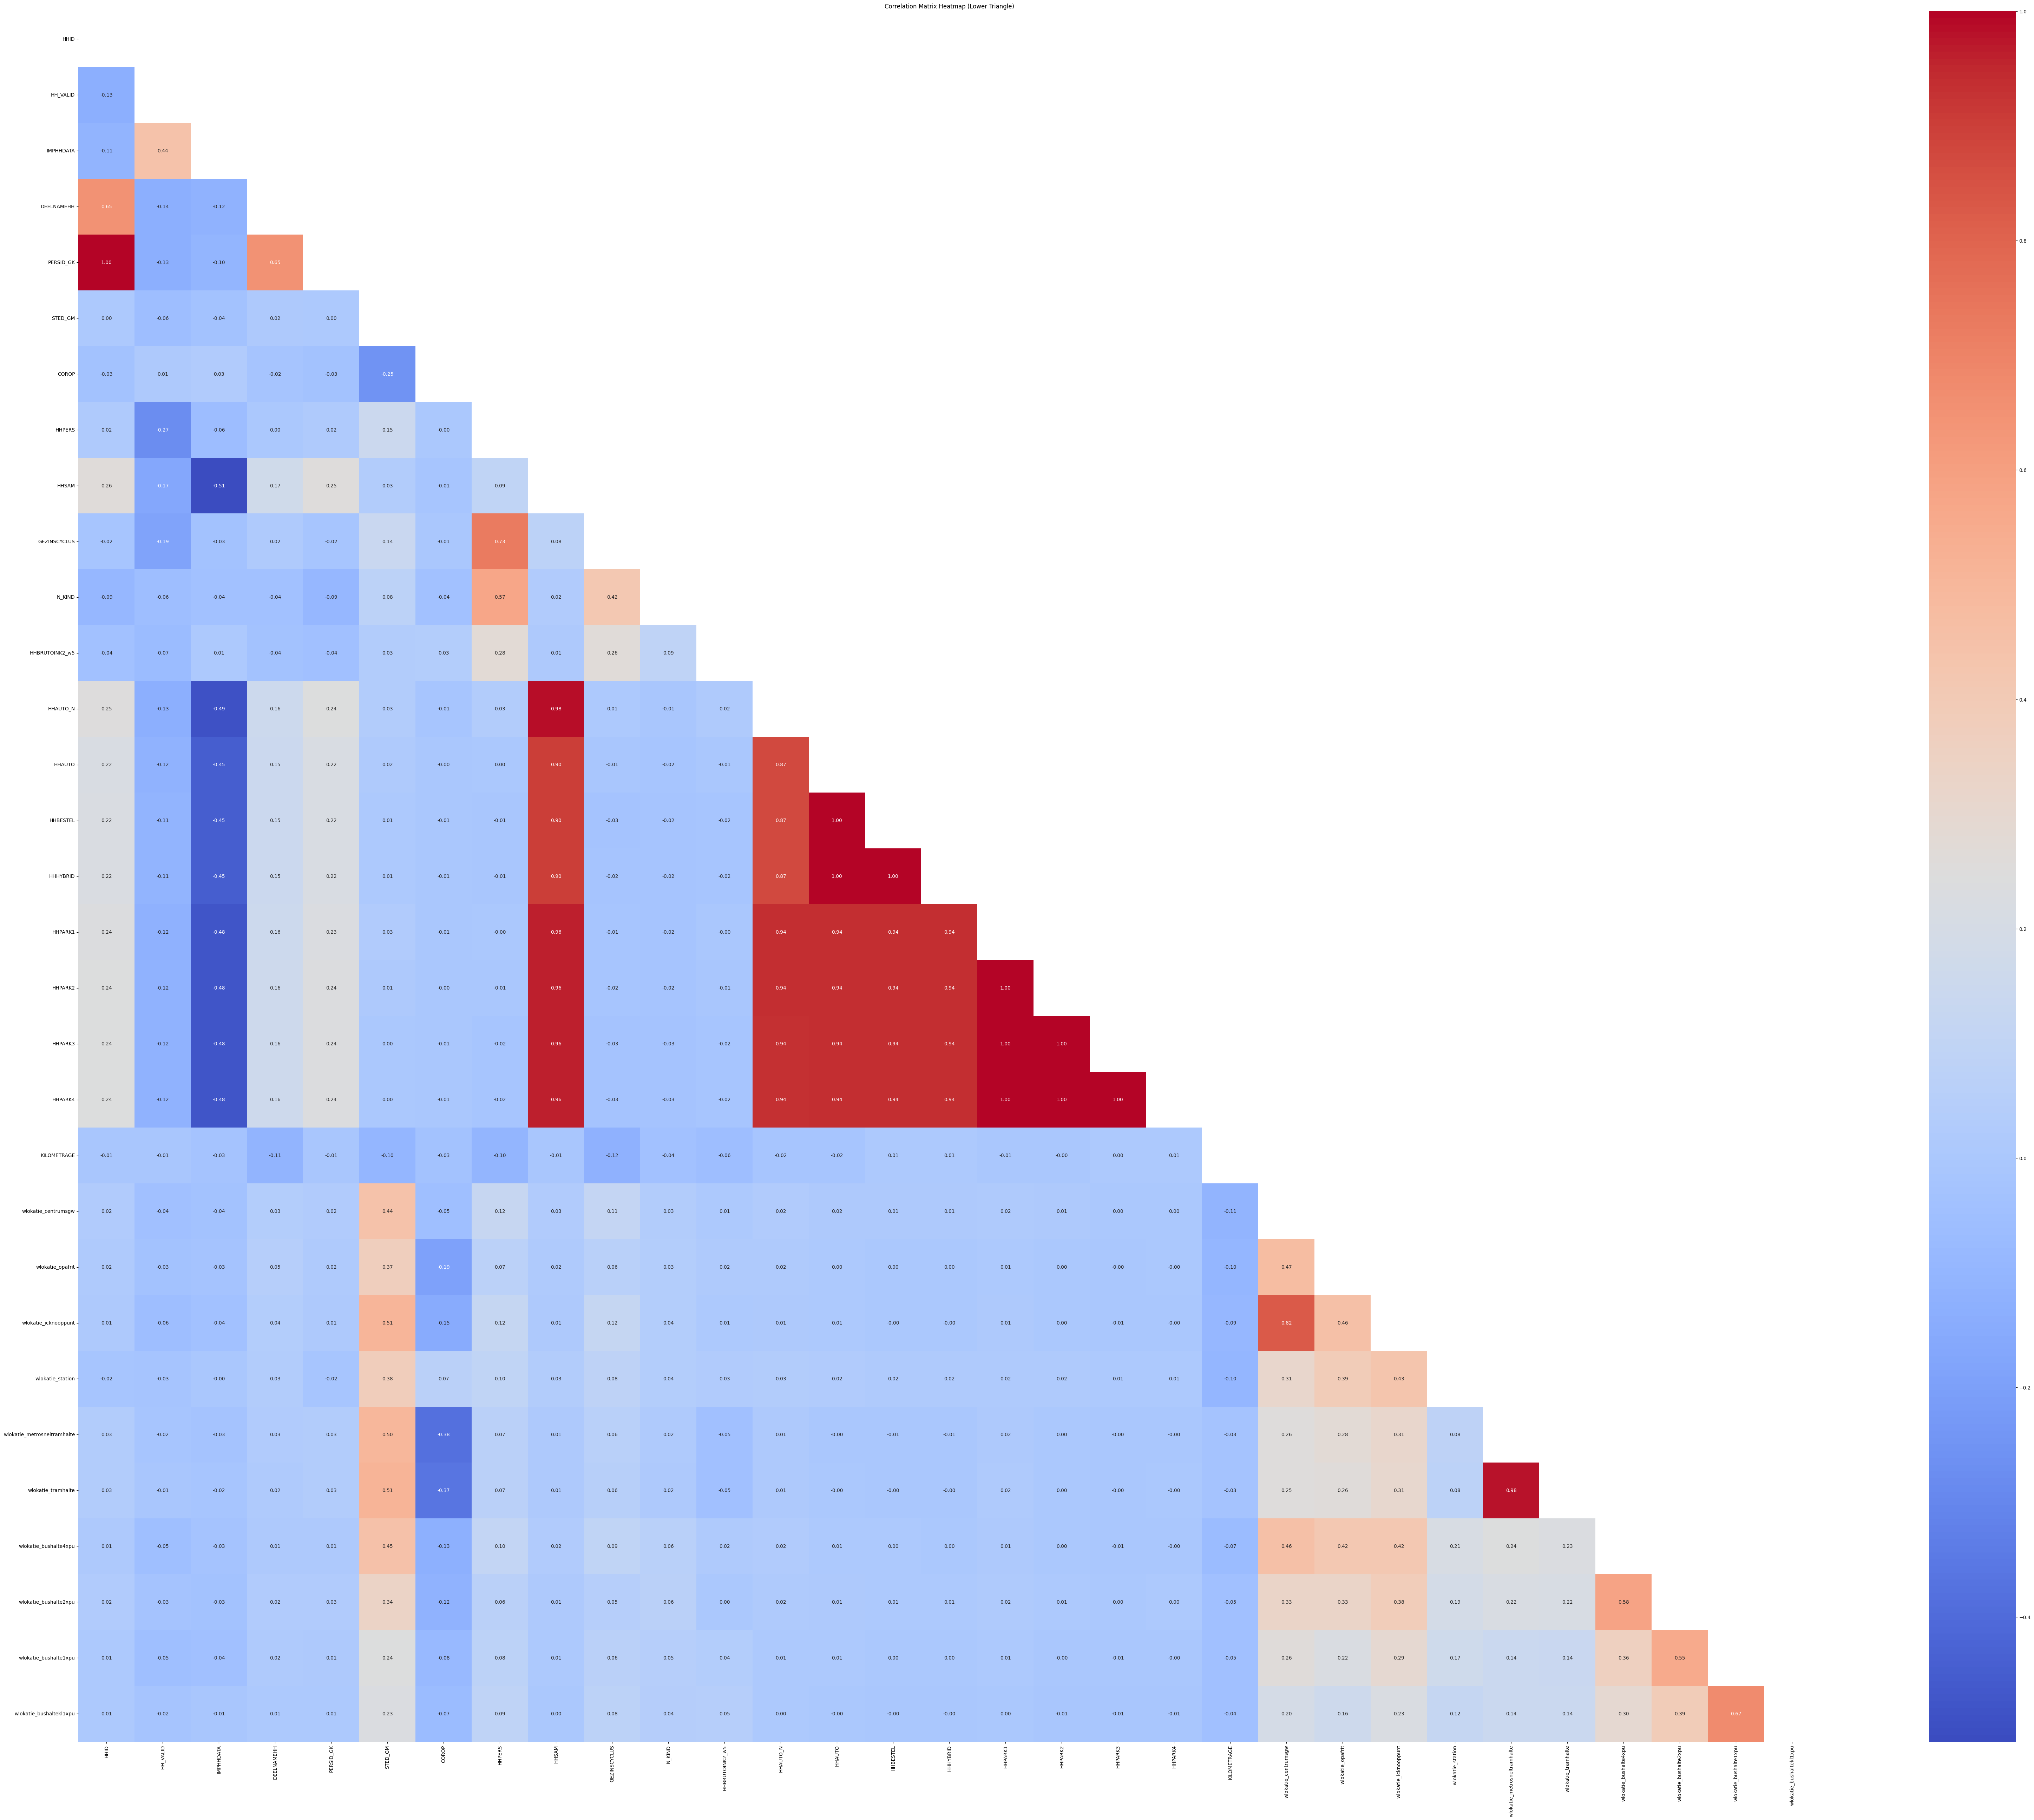

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'correlation_matrix' is your computed correlation matrix

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap using seaborn with masked upper triangle
plt.figure(figsize=(80, 64))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap (Lower Triangle)')
plt.show()



